In [1]:
# Section 0: Visualization

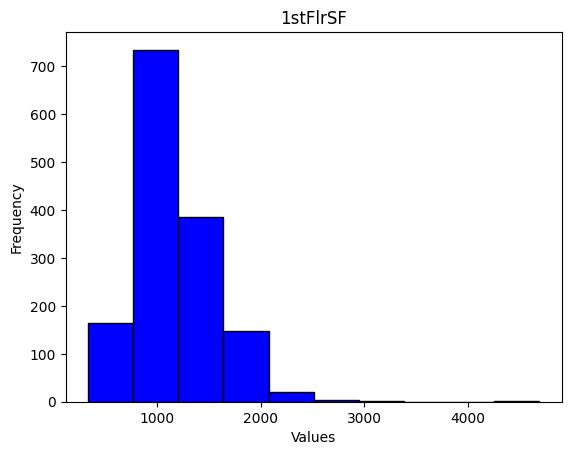

In [2]:
# Visualize a continuous feature (1stFlrSF)
# Other examples of continuous: 2ndFlrSF, LotArea
import graphing

graphing.plot_distribution_of_continuous("1stFlrSF")

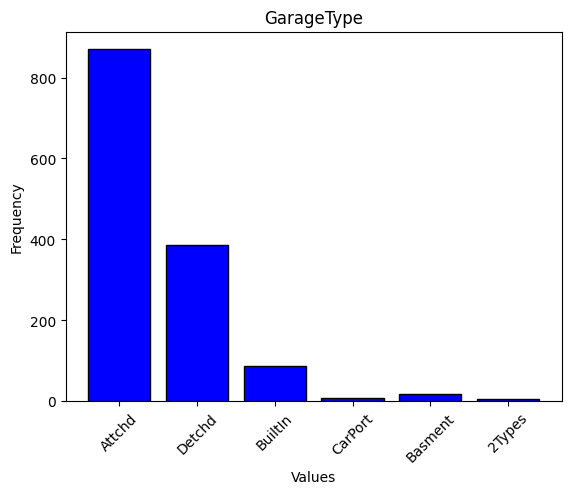

In [3]:
# Visualize a categorical feature (GarageType)
# Other examples of categorical: CentralAir, HeatingQC
import graphing

graphing.plot_distribution_of_categorical("GarageType")

In [4]:
# Section 1: Dealing with missing values

In [5]:
# I followed through Kaggle's courses for data cleaning and feature engineering
# and applied it to our project
import pandas as pd
import numpy as np

data = pd.read_csv("../data/train.csv")

np.random.seed(0)


In [6]:
# check for missing attributes
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# actually calculate missing data points
missing_count = data.isnull().sum()

missing_count[0:10]

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [8]:
# get percent of values missing
total_cells = np.prod(data.shape)
total_missing = missing_count.sum()

percent_missing = (total_missing/total_cells)*100
print(percent_missing)

6.620158971757145


In [9]:
# get names of columns with missing values
for name,count in missing_count.items():
    if count > 0:
        print(name)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [10]:
# determine if missing values are actually missing (like person forgot to record it)
# or because it wasn't recorded because its 0 or some default (imputation)
# Actually missing: LotFrontage, Electrical, 
# Not recorded: MasVnrType, MasVnrArea, GarageYrBlt
    # MasVnrType: NA should be None
    # MasVnrArea: NA should be 0
    # GarageYrBlt: NA is because there is no garage... 0? But this does not really make sense
# Special cases where NA is actual a valid input: Alley, BsmtQual,BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

In [11]:
# Explicitly turn special cases where NA is valid input into "None"
special_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                   'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                    'GarageType', 'GarageFinish', 'GarageQual',
                    'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
               ]

data[special_cols] = data[special_cols].fillna("None")

In [12]:
# Fill in not recorded values
data['MasVnrType'] = data['MasVnrType'].fillna('None')

data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [13]:
# See how many missing values in columns with actually missing values
missing1 = data.loc[:, 'LotFrontage'].isnull().sum()
missing2 = data.loc[:, 'Electrical'].isnull().sum()
print(missing1, missing2)

259 1


In [14]:
# Remove missing columns with many missing values and remove the single row that is missing
data = data.drop('LotFrontage', axis=1)
data = data.dropna(subset=['Electrical'])

In [15]:
# Save and verify missing percentage
data.to_csv('handle_missing.csv')
missing_count = data.isnull().sum()
total_cells = np.prod(data.shape)
total_missing = missing_count.sum()

percent_missing = (total_missing/total_cells)*100
print(percent_missing)

0.0


In [16]:
# Section 3: Dealing with Categorical Values

In [17]:
# The two main methods are going to be target-encoding and one-hot encoding.
# Use target-encoding when one-hot is not feasable (high-cardinality)

In [18]:
# Get all categorical columns
categorical_cols = list(data.select_dtypes(include=['object','category']).columns)

additional_categorical_cols = ['MSSubClass']
data['MSSubClass'] = data['MSSubClass'].astype(str)
print(data['MSSubClass'].dtype)

all_categorical_cols = categorical_cols + additional_categorical_cols
print(all_categorical_cols)

object
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


In [19]:
# Get cardinality of each categorical column
cardinality = data[all_categorical_cols].nunique()
print(cardinality)

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
MSSubClass       15
dtype: int64


In [20]:
# Do target encoding on high cardinality categorical attributes
# Neighborhood, Exterior1st, Exterior2nd, MSSubClass

data["Neighborhood_encoded"] = data.groupby("Neighborhood")["SalePrice"].transform("mean")
data["Exterior1st_encoded"] = data.groupby("Exterior1st")["SalePrice"].transform("mean")
data["Exterior2nd_encoded"] = data.groupby("Exterior2nd")["SalePrice"].transform("mean")
data["MSSubClass_encoded"] = data.groupby("MSSubClass")["SalePrice"].transform("mean")

data[["MSSubClass", "SalePrice", "MSSubClass_encoded"]].head(10)

,MSSubClass,SalePrice,MSSubClass_encoded
0,60,208500,239948.501672
1,20,181500,185224.811567
2,60,223500,239948.501672
3,70,140000,166772.416667
4,60,250000,239948.501672
5,50,143000,143302.972222
6,20,307000,185224.811567
7,60,200000,239948.501672
8,50,129900,143302.972222
9,190,118000,129613.333333


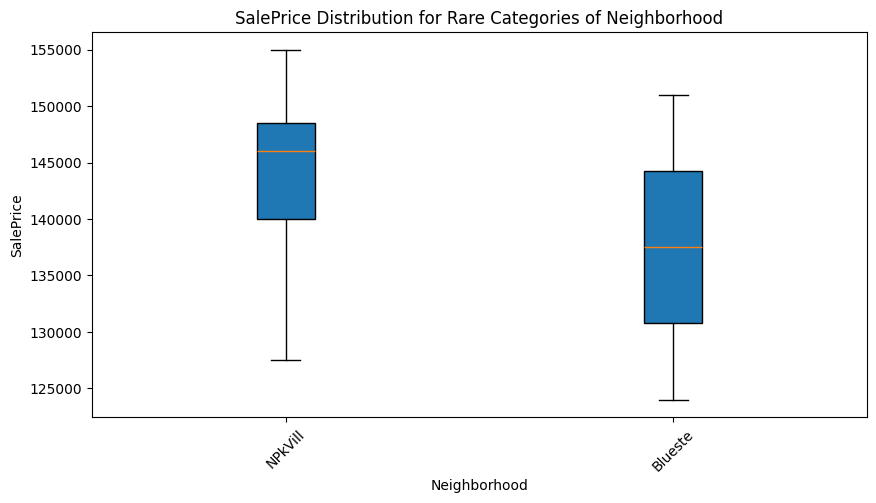

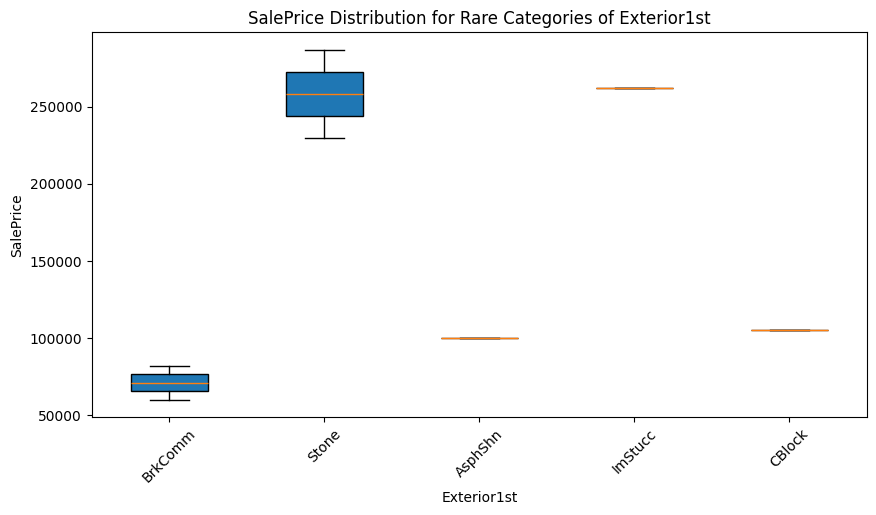

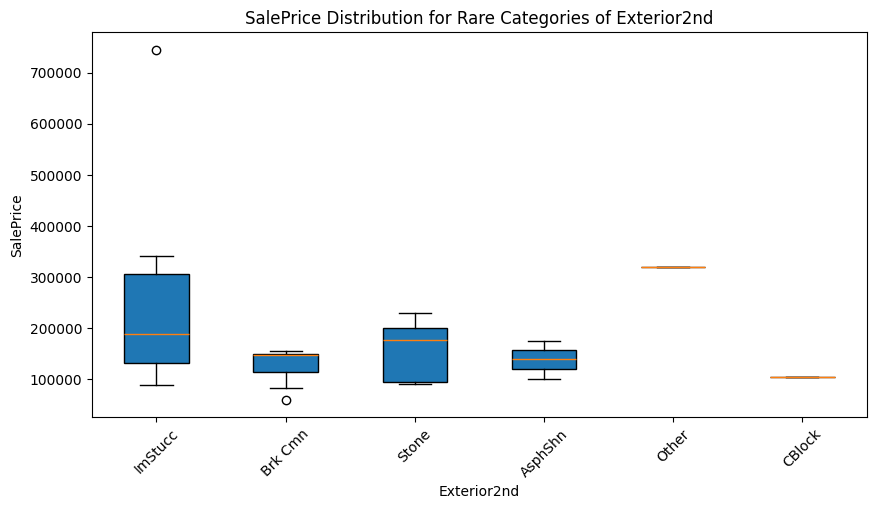

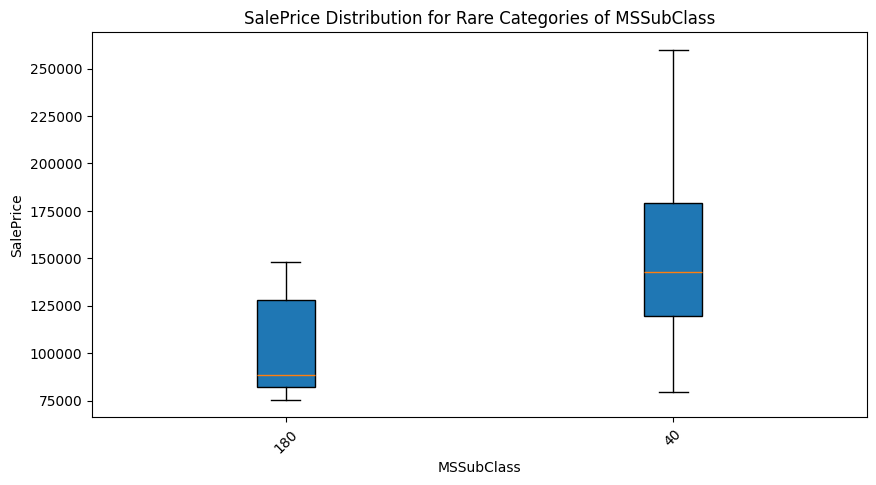

In [21]:
# Visualize distribution of SalePrice in rare categories within each of the following attributes
# Neighborhood, Exterior1st, Exterior2nd, MSSubClass
import matplotlib.pyplot as plt

columns_to_check = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'MSSubClass']
rare_threshold = 10

for col in columns_to_check:
    counts = data[col].value_counts()
    rare_categories = counts[counts <= rare_threshold].index
    
    if len(rare_categories) == 0:
        print(f"No rare categories found for {col}")
        continue
    
    rare_data = data[data[col].isin(rare_categories)]

    # Adapted from code generated by ChatGPT (OpenAI, 2025)
    # Prompt: "Visualize distribution of SalePrice in rare categories within each of the following attributes
            # Neighborhood, Exterior1st, Exterior2nd, MSSubClass"
    data_to_plot = [rare_data[rare_data[col] == category]['SalePrice'].values 
                    for category in rare_categories]
    plt.figure(figsize=(10, 5))
    plt.boxplot(data_to_plot, tick_labels=rare_categories, patch_artist=True)
    plt.title(f"SalePrice Distribution for Rare Categories of {col}")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=45)
    plt.show()

In [23]:
# Apply smoothing and drop original non-encoded column

global_mean = data['SalePrice'].mean()
target = 'SalePrice'
m = 1

# Adapted from Kaggle Feature Engineering course by Ryan Holbrook:
# https://www.kaggle.com/code/ryanholbrook/mutual-information
def smoothed_target_encoding(feature):
    encoded_col = feature + '_encoded'
    categories = data[feature].unique()
    counts = data[feature].value_counts()
    for category in categories:
        n = counts.get(category, 0)
        category_mean = data.loc[data[feature] == category, target].mean()
        weight = n/(n+m)
        smoothed_value = weight * category_mean + (1-weight) * global_mean
        data.loc[data[feature] == category, encoded_col] = smoothed_value
    print(data[encoded_col].head())

for col in columns_to_check:
    smoothed_target_encoding(col) 

0    197852.956257
1    233952.532899
2    197852.956257
3    210053.680669
4    331619.961781
Name: Neighborhood_encoded, dtype: float64
0    213758.979407
1    149564.748393
2    213758.979407
3    149991.832825
4    213758.979407
Name: Exterior1st_encoded, dtype: float64
0    214459.107926
1    149947.950673
2    214459.107926
3    161831.548584
4    214459.107926
Name: Exterior2nd_encoded, dtype: float64
0    239751.774649
1    185216.814515
2    239751.774649
3    167004.514669
4    239751.774649
Name: MSSubClass_encoded, dtype: float64


In [24]:
# One-hot encode remaining categorical attributes
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
categoricals_to_OHE = set(all_categorical_cols)-set(columns_to_check)

for feature in categoricals_to_OHE:
    encoded = encoder.fit_transform(data[[feature]])
    encoded_df = pd.DataFrame(
        encoded,
        columns=encoder.get_feature_names_out([feature]),
        index=data.index
    )
    data = pd.concat([data, encoded_df], axis=1)

data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Electrical_Mix,Electrical_SBrkr,PavedDrive_N,PavedDrive_P,PavedDrive_Y,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


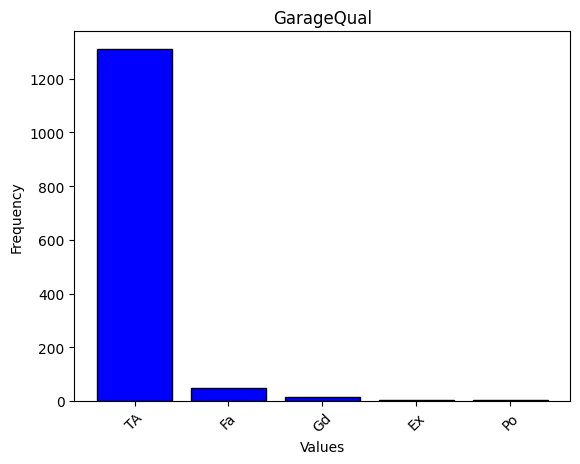

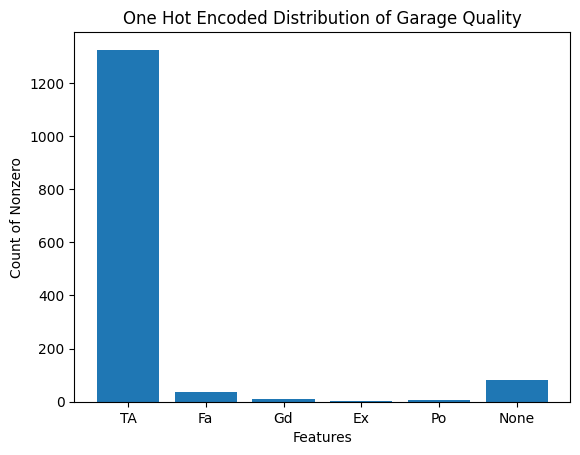

In [25]:
# Visualize one example of OHE
# Original: GarageQual
# OHEs: GarageQual_Ex, GarageCond_Fa, GarageCond_Gd, GarageCond_None, GarageCond_Po, GarageCond_TA
import graphing
from matplotlib import pyplot as plt

# This function uses original data before any preprocessing
graphing.plot_distribution_of_categorical("GarageQual")

garage_ex = (data["GarageQual_Ex"] != 0).sum()
garage_gd = (data["GarageCond_Gd"] != 0).sum()
garage_ta = (data["GarageCond_TA"] != 0).sum()
garage_fa = (data["GarageCond_Fa"] != 0).sum()
garage_po = (data["GarageCond_Po"] != 0).sum()
garage_none = (data["GarageCond_None"] != 0).sum()

plt.bar(["TA","Fa","Gd","Ex","Po","None"],[garage_ta,garage_fa,garage_gd,garage_ex,garage_po,garage_none])
plt.ylabel("Count of Nonzero")
plt.xlabel("Features")
plt.title("One Hot Encoded Distribution of Garage Quality")
plt.show()

In [26]:
# Remove old categorical data
data = data.drop(columns=all_categorical_cols, errors='ignore')
data.head()
data.to_csv('handle_categorical.csv', index=False)

In [27]:
# Section 4: Mutual Information

In [28]:
# Utility functions from Kaggle
# From Kaggle Feature Engineering course by Ryan Holbrook:
# https://www.kaggle.com/code/ryanholbrook/mutual-information
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [29]:
# Prepare data for MI
X = data.copy().drop(columns=["SalePrice"])
y = data["SalePrice"]


In [30]:
# Perform mutual information
mi_scores = make_mi_scores(X, y)
mi_scores[::3] 

OverallQual         0.565867
YearBuilt           0.377033
GarageCars          0.359527
ExterQual_TA        0.267867
YearRemodAdd        0.246621
                      ...   
ExterCond_Po        0.000000
Functional_Mod      0.000000
LotShape_IR3        0.000000
BsmtFinType2_BLQ    0.000000
PoolQC_Fa           0.000000
Name: MI Scores, Length: 83, dtype: float64

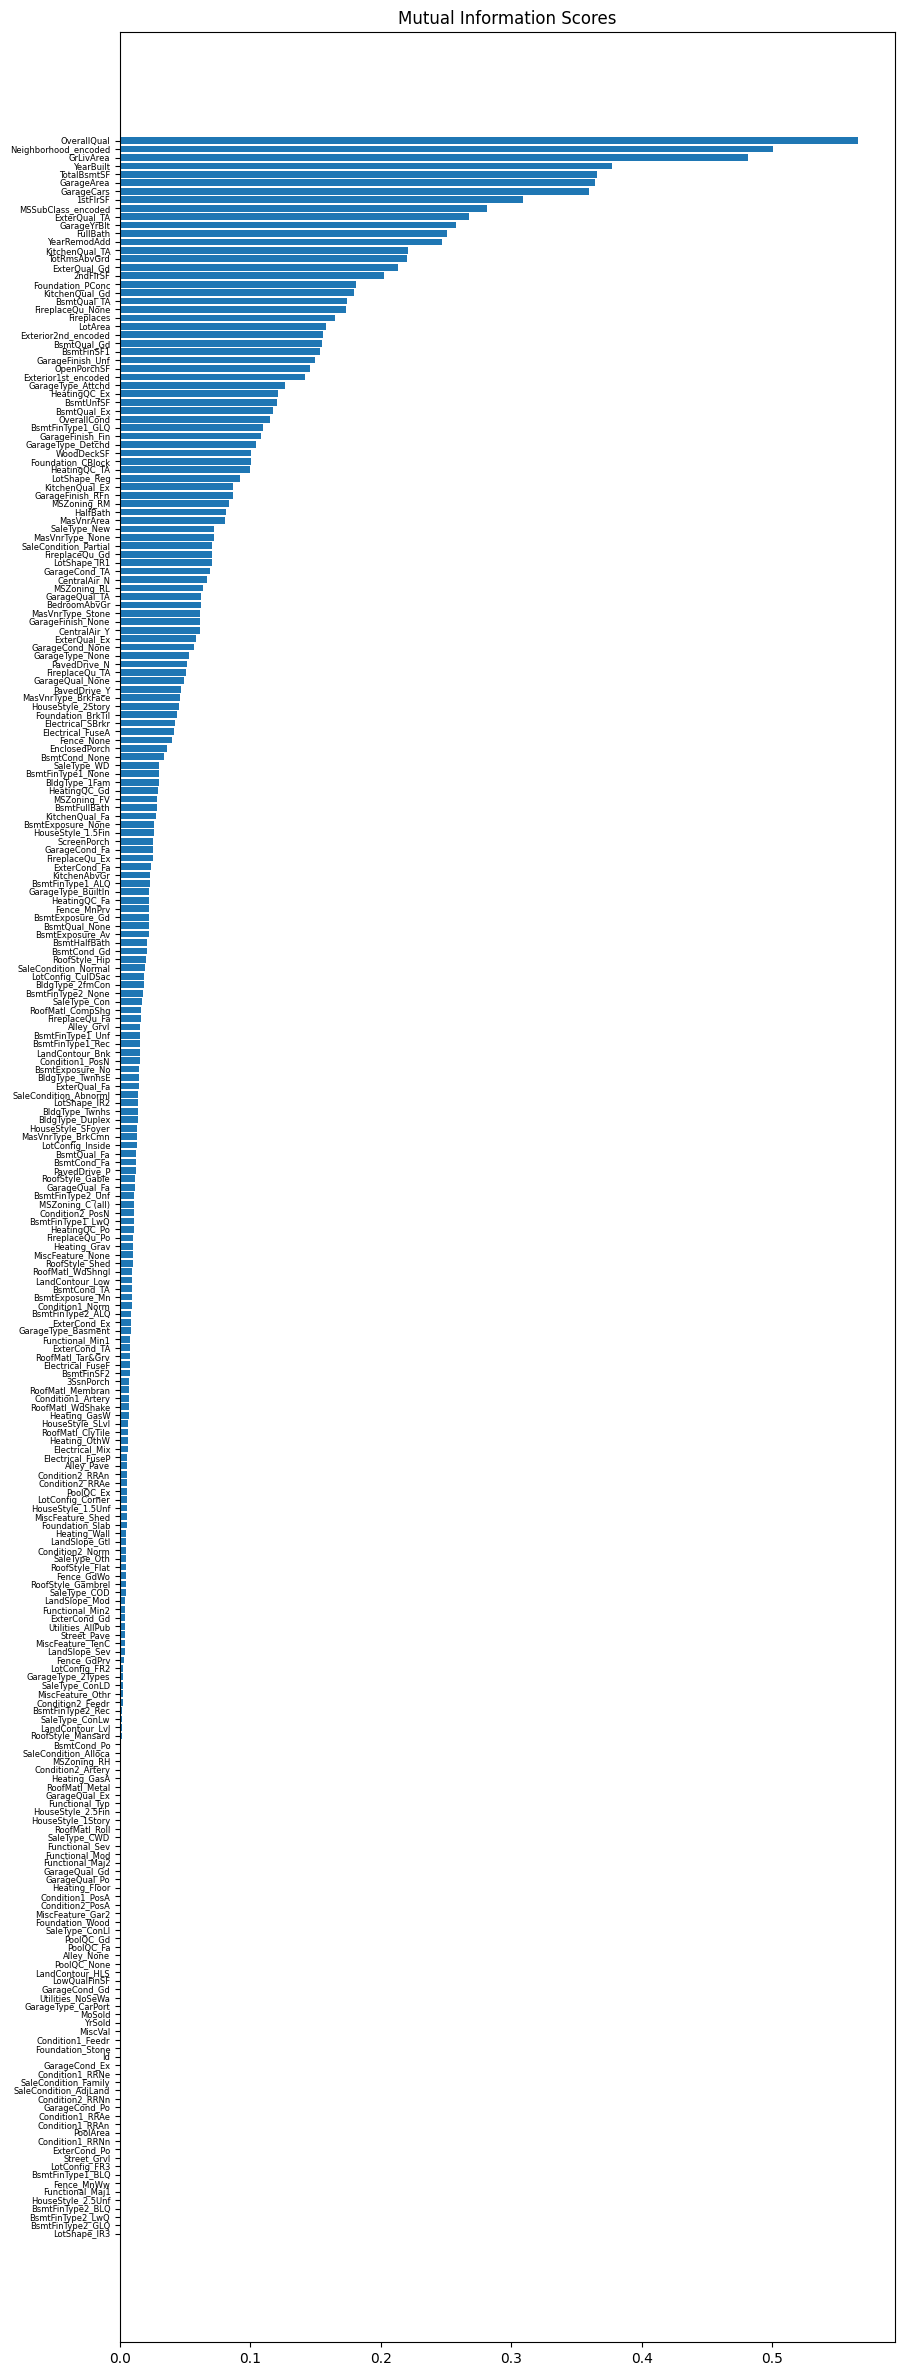

In [31]:
# Plot MI scores
plt.figure(dpi=100, figsize=(10, 30))  
plt.tick_params(axis="y", labelsize=6)  
plot_mi_scores(mi_scores)

In [32]:
# Choose top-k MI features
# I will try k = 10, 20, 30, 40, 50
# So for now, extract top 50

k=50
top_features = mi_scores.head(k).index.tolist()
top_50_features = data[top_features]
print(top_50_features.head())

print(top_50_features.shape)
top_50_features.head()
top_50_features.to_csv("handle_MI.csv", index=False)

   OverallQual  Neighborhood_encoded  GrLivArea  YearBuilt  TotalBsmtSF  \
0            7         197852.956257       1710       2003          856   
1            6         233952.532899       1262       1976         1262   
2            7         197852.956257       1786       2001          920   
3            7         210053.680669       1717       1915          756   
4            8         331619.961781       2198       2000         1145   

   GarageArea  GarageCars  1stFlrSF  MSSubClass_encoded  ExterQual_TA  ...  \
0         548           2       856       239751.774649           0.0  ...   
1         460           2      1262       185216.814515           1.0  ...   
2         608           2       920       239751.774649           0.0  ...   
3         642           3       961       167004.514669           1.0  ...   
4         836           3      1145       239751.774649           0.0  ...   

   LotShape_Reg  KitchenQual_Ex  GarageFinish_RFn  MSZoning_RM  HalfBath  \
0   

In [33]:
# Section 5: Creating features
# Tips by Kaggle suggest to try (sensible) ratio combinations for easy performance gains.
# Sums and differences are usually learned by the linear model.

In [34]:
# Add back in features that I think are related (domain-wise) to current top-k

# YearBuilt and GarageYrBlt and YearRemodAdd probably also relate on when the
# house was sold (since it makes sense that people think about "how long has it been since built")
# which depends on YrSold
top_50_features_plus = pd.concat([top_50_features, data["YrSold"]],axis=1)
print(top_50_features_plus.shape)

(1459, 51)


   OverallQual  Neighborhood_encoded  GrLivArea  YearBuilt  TotalBsmtSF  \
0            7         197852.956257       1710       2003          856   
1            6         233952.532899       1262       1976         1262   
2            7         197852.956257       1786       2001          920   
3            7         210053.680669       1717       1915          756   
4            8         331619.961781       2198       2000         1145   

   GarageArea  GarageCars  1stFlrSF  MSSubClass_encoded  ExterQual_TA  ...  \
0         548           2       856       239751.774649           0.0  ...   
1         460           2      1262       185216.814515           1.0  ...   
2         608           2       920       239751.774649           0.0  ...   
3         642           3       961       167004.514669           1.0  ...   
4         836           3      1145       239751.774649           0.0  ...   

   KitchenQual_Ex  GarageFinish_RFn  MSZoning_RM  HalfBath  MasVnrArea  \
0     

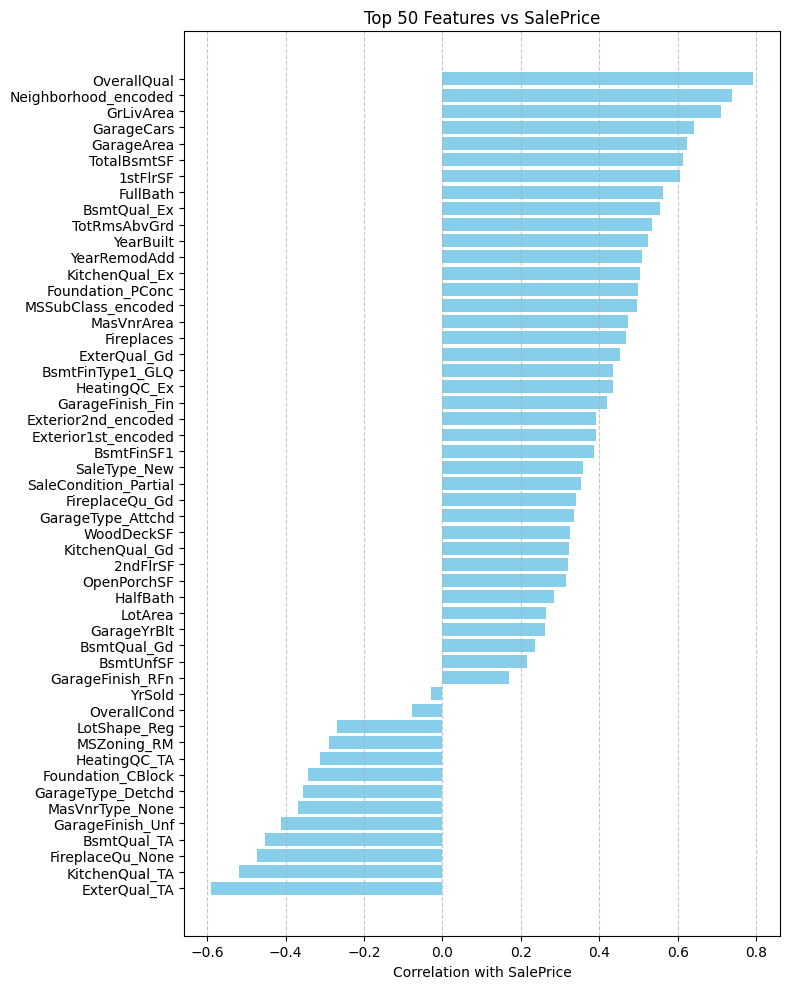

In [35]:
# Visualize heatmap of top-k features

# Adapted from code generated by ChatGPT (OpenAI, 2025)
# Prompt: "Is there a way to visualize on x y plane relationship between 50 features"
corr_with_target = top_50_features_plus.corrwith(data["SalePrice"]).sort_values()
print(top_50_features_plus.head())

plt.figure(figsize=(8, 10))  
plt.barh(corr_with_target.index, corr_with_target.values, color='skyblue')
plt.xlabel("Correlation with SalePrice")
plt.title("Top 50 Features vs SalePrice")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

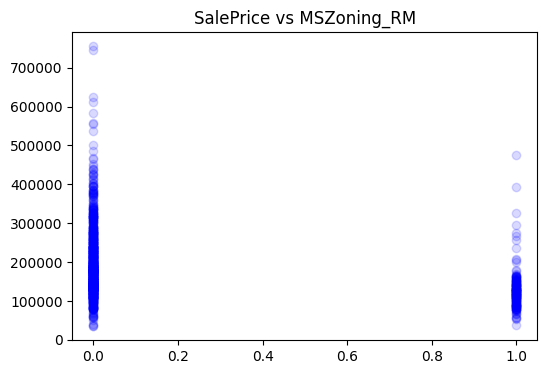

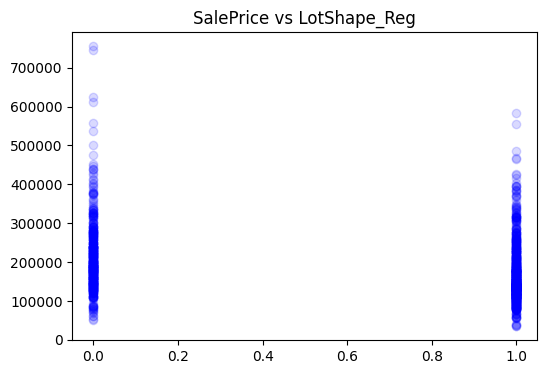

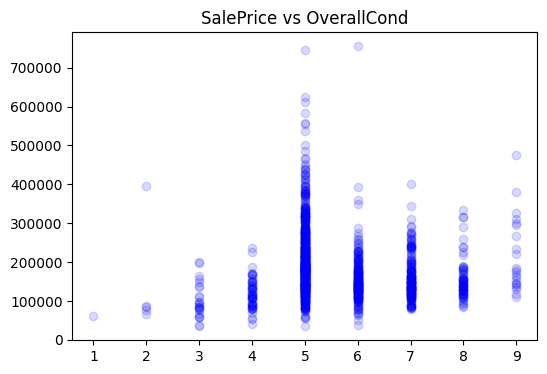

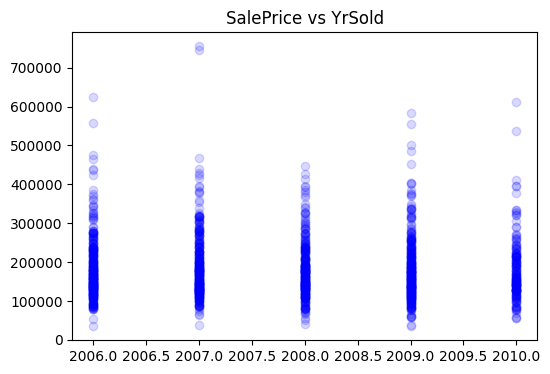

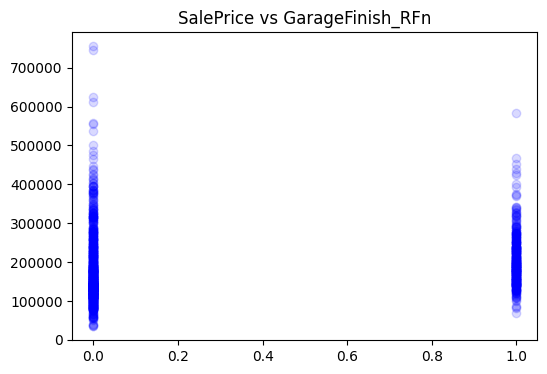

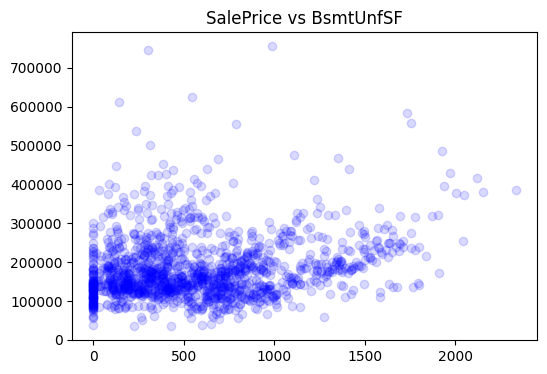

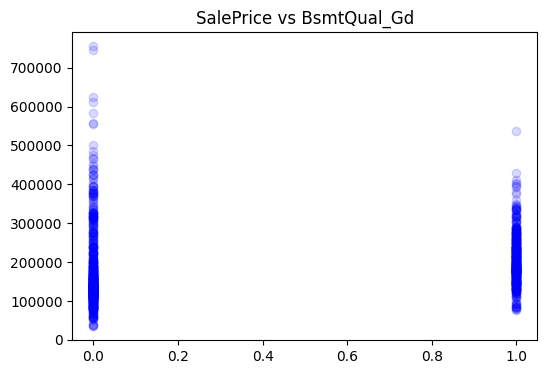

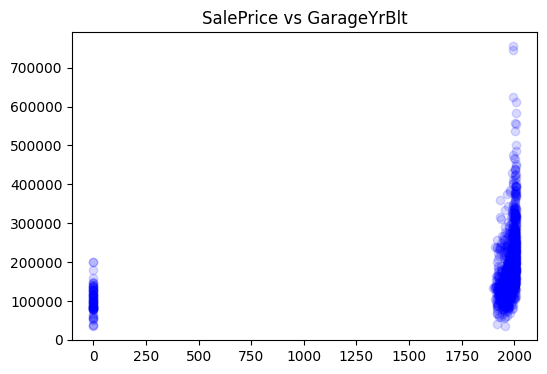

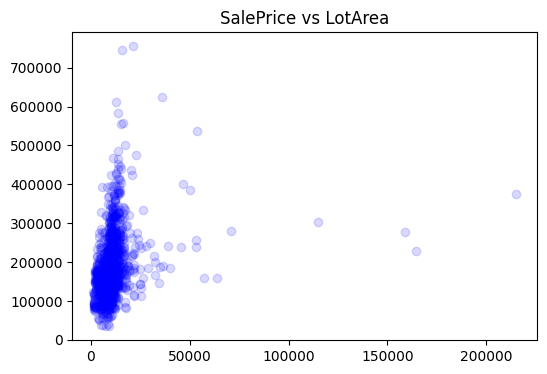

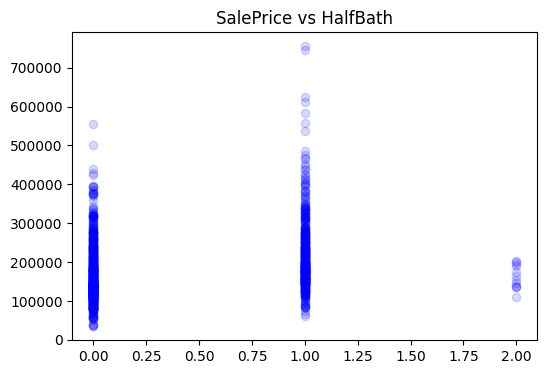

In [36]:
# Visualize features with correlation close to 0
# Since, they have high(ish) MI, there might be a non-linear correlation

low_corr_features = corr_with_target[abs(corr_with_target) < 0.3].index.tolist()

for feature in low_corr_features:
    plt.figure(figsize=(6,4))
    plt.scatter(top_50_features_plus[feature], data["SalePrice"], color="blue", alpha=0.15)
    plt.title(f"SalePrice vs {feature}")
    plt.show()

In [37]:
# Remove features that seem to have no correlation (linear or nonlinear)
# BsmtQual_Gd, GarageFinish_RFn, LotShape_Reg
top_50_features_dropped = top_50_features_plus.drop(columns=["BsmtQual_Gd", "GarageFinish_RFn", "LotShape_Reg"], errors='ignore')

In [38]:
# Feature engineering that I did not do:
# Clustering with K-means and Principle Component Analysis

In [39]:
# Section 6: Scaling and Normalization

In [40]:
from scipy import stats

from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)

In [41]:
# I will only do scaling, not normalization
# linear regression does not assume my data is normally distributed
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(top_50_features_dropped), columns=top_50_features_dropped.columns)
print(data_scaled)

      OverallQual  Neighborhood_encoded  GrLivArea  YearBuilt  TotalBsmtSF  \
0        0.666667              0.416806   0.259231   0.949275     0.140098   
1        0.555556              0.574192   0.174830   0.753623     0.206547   
2        0.666667              0.416806   0.273549   0.934783     0.150573   
3        0.666667              0.469998   0.260550   0.311594     0.123732   
4        0.777778              1.000000   0.351168   0.927536     0.187398   
...           ...                   ...        ...        ...          ...   
1454     0.555556              0.394364   0.247362   0.920290     0.155974   
1455     0.555556              0.377949   0.327619   0.768116     0.252373   
1456     0.666667              0.469998   0.377920   0.500000     0.188543   
1457     0.444444              0.190749   0.140166   0.565217     0.176432   
1458     0.444444              0.115496   0.173700   0.673913     0.205565   

      GarageArea  GarageCars  1stFlrSF  MSSubClass_encoded  Ext

In [42]:
# Also scale SalePrice
y = data['SalePrice'].values.reshape(-1, 1)
scaled_y = pd.DataFrame(scaler.fit_transform(y), columns=['SalePrice'])
print(scaled_y.head())

   SalePrice
0   0.241078
1   0.203583
2   0.261908
3   0.145952
4   0.298709


In [52]:
# Section 7: Define multiple sets

In [101]:
# Get top-k from MI scores of the scaled data
# k = 10, 20, 30, 40, 50

ks = [10,20,30,40,50]
features_in_top_k = {}
for k in ks:
    top_features = mi_scores.head(k).index.tolist()
    existing_cols = [c for c in top_features if c in data_scaled.columns]
    # don't forget YrSold
    existing_cols.append('YrSold')
    k_data_scaled = data_scaled[existing_cols]
    features_in_top_k[k] = existing_cols
    k_data_scaled.to_csv(f"./manual/preprocessed_{k}.csv", index=False)

scaled_y.to_csv('./manual/preprocessed_y.csv', index=False)
print(features_in_top_k)

{10: ['OverallQual', 'Neighborhood_encoded', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', 'GarageCars', '1stFlrSF', 'MSSubClass_encoded', 'ExterQual_TA', 'YrSold'], 20: ['OverallQual', 'Neighborhood_encoded', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', 'GarageCars', '1stFlrSF', 'MSSubClass_encoded', 'ExterQual_TA', 'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'KitchenQual_TA', 'TotRmsAbvGrd', 'ExterQual_Gd', '2ndFlrSF', 'Foundation_PConc', 'KitchenQual_Gd', 'BsmtQual_TA', 'YrSold'], 30: ['OverallQual', 'Neighborhood_encoded', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', 'GarageCars', '1stFlrSF', 'MSSubClass_encoded', 'ExterQual_TA', 'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'KitchenQual_TA', 'TotRmsAbvGrd', 'ExterQual_Gd', '2ndFlrSF', 'Foundation_PConc', 'KitchenQual_Gd', 'BsmtQual_TA', 'FireplaceQu_None', 'Fireplaces', 'LotArea', 'Exterior2nd_encoded', 'BsmtFinSF1', 'GarageFinish_Unf', 'OpenPorchSF', 'Exterior1st_encoded', 'GarageType_Attchd', 'YrSold'], 

In [102]:
# Section 8: Define pipeline and apply to test data

In [103]:
# Figure out original attribute source for each feature
import re

# Adapted from code generated by ChatGPT (OpenAI, 2025)
# Prompt: "How to select for all with *_ with regex"
categorical_attributes = []
numerical_attributes = []
categorical_attributes_target_encoded = []
for feature in features_in_top_k[50]:
    if re.match(r'^[^_]+$', feature):
        numerical_attributes.append(feature)
    elif re.match(r'.*_encoded.*', feature):
        categorical_attributes_target_encoded.append(feature)
    else:
        categorical_attributes.append(feature)
print(categorical_attributes)
print(categorical_attributes_target_encoded)
print(numerical_attributes)

['ExterQual_TA', 'KitchenQual_TA', 'ExterQual_Gd', 'Foundation_PConc', 'KitchenQual_Gd', 'BsmtQual_TA', 'FireplaceQu_None', 'GarageFinish_Unf', 'GarageType_Attchd', 'HeatingQC_Ex', 'BsmtQual_Ex', 'BsmtFinType1_GLQ', 'GarageFinish_Fin', 'GarageType_Detchd', 'Foundation_CBlock', 'HeatingQC_TA', 'KitchenQual_Ex', 'MSZoning_RM', 'SaleType_New', 'MasVnrType_None', 'SaleCondition_Partial', 'FireplaceQu_Gd']
['Neighborhood_encoded', 'MSSubClass_encoded', 'Exterior2nd_encoded', 'Exterior1st_encoded']
['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', 'GarageCars', '1stFlrSF', 'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', '2ndFlrSF', 'Fireplaces', 'LotArea', 'BsmtFinSF1', 'OpenPorchSF', 'BsmtUnfSF', 'OverallCond', 'WoodDeckSF', 'HalfBath', 'MasVnrArea', 'YrSold']


In [104]:
# Identify if any specially handled missing values exist
# and convert OHE/TE features to original attributes

# Reminder:
    # Actually missing: LotFrontage, Electrical, (removed from dataset)
    # Not recorded: MasVnrType, MasVnrArea, GarageYrBlt
        # MasVnrType: NA should be None
        # MasVnrArea: NA should be 0
        # GarageYrBlt: NA is because there is no garage... 0? But this does not really make sense
    # Special cases where NA is actual a valid input: Alley, BsmtQual,BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

special_cases = ['LotFrontage', 'Electrical', 'MasVnrType', 'MasVnrArea', 'GarageYrBlt', 'GarageFinish',
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature']

def base_name(s):
    return s.split('_')[0]

missing_set = set(special_cases)
categorical_base = set(base_name(f) for f in categorical_attributes)
categorical_te_base = set(base_name(f) for f in categorical_attributes_target_encoded)
numerical_base = set(base_name(f) for f in numerical_attributes)

# Check for intersection
matches = missing_set & (categorical_base | categorical_te_base | numerical_base)
print(matches)

# Turn NA to 0: MasVnrArea, GarageYrBlt
# Turn NA to 'None': GarageType, MasVnrType, BsmtFinTyp1, BsmtQual, FireplaceQu, GarageFinish
# None of these are special. It is just categoricals replace to 'None' and numericals replace to '0'

{'GarageType', 'MasVnrType', 'BsmtFinType1', 'BsmtQual', 'MasVnrArea', 'FireplaceQu', 'GarageFinish', 'GarageYrBlt'}


In [115]:
# Define pipeline
# Adapted from code generated by ChatGPT (OpenAI, 2025)
# Prompt: "do i also need to preprocess my testing data the same way as my training data"
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from category_encoders import TargetEncoder
import numpy as np

numerical_features = list(numerical_base)
target_encoded_features = list(categorical_te_base)
ohe_features = list(categorical_base)

# Handle missing values
def fill_missing(X):
    X = X.copy()
    for col in numerical_features:
        if col in X.columns:
            X[col] = X[col].fillna(0)
    for col in ohe_features:
        if col in X.columns:
            X[col] = X[col].fillna('None')
    for col in target_encoded_features:
        if col in X.columns:
            X[col] = X[col].fillna('None')
    return X

missing_filler = FunctionTransformer(func=fill_missing)

# Handle categorical values and scale
preprocessor = ColumnTransformer(
    transformers=[
        ('target', Pipeline([
            ('te', TargetEncoder(smoothing=1)),
            ('scaler', MinMaxScaler())
        ]), target_encoded_features),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ohe_features),
        ('num', MinMaxScaler(), numeric_features)
    ],
    remainder='drop'
)

# Define pipeline
pipeline = Pipeline(steps=[
    ('fill_missing', missing_filler),
    ('preprocessing', preprocessor)
])

In [116]:
# Fit pipelines
train_data = pd.read_csv("../data/train.csv")
X_train_prepared = pipeline.fit_transform(train_data, train_data['SalePrice'])

In [117]:
# Extract processed array to DataFrame
target_names = target_encoded_features
ohe = pipeline.named_steps['preprocessing'].named_transformers_['ohe']
ohe_names = ohe.get_feature_names_out(ohe_features)
numeric_names = numerical_features

all_feature_names = list(target_names) + list(ohe_names) + list(numeric_names)

X_train_df = pd.DataFrame(X_train_prepared, columns=all_feature_names)
print(X_train_df.head())

   Exterior1st  MSSubClass  Neighborhood  Exterior2nd  GarageType_2Types  \
0     0.794856    0.235294      0.416045     0.810402                0.0   
1     0.060189    0.000000      0.343598     0.027993                0.0   
2     0.794856    0.235294      0.416045     0.810402                0.0   
3     0.064981    0.294118      0.469874     0.167525                0.0   
4     0.794856    0.235294      1.000000     0.810402                0.0   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                1.0                 0.0                 0.0   
1                1.0                 0.0                 0.0   
2                1.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                1.0                 0.0                 0.0   

   GarageType_CarPort  GarageType_Detchd  ...  GrLivArea  TotalBsmtSF  \
0                 0.0                0.0  ...   0.259231     0.140098   
1           

In [119]:
# Filter training data columns by top-k
pipeline_train = {}
for k, features in features_in_top_k.items():
    # Rename "feature_encoded" to "feature"
    features = [a.replace('_encoded', '') for a in features]
    pipeline_train[k] = X_train_df[features]

In [120]:
# Validate pipeline by comparing to manual preprocessing for 10
print(pipeline_train[10].head())
print(pd.read_csv("./manual/preprocessed_10.csv").head())

   OverallQual  Neighborhood  GrLivArea  YearBuilt  TotalBsmtSF  GarageArea  \
0     0.666667      0.416045   0.259231   0.949275     0.140098    0.386460   
1     0.555556      0.343598   0.174830   0.753623     0.206547    0.324401   
2     0.666667      0.416045   0.273549   0.934783     0.150573    0.428773   
3     0.666667      0.469874   0.260550   0.311594     0.123732    0.452750   
4     0.777778      1.000000   0.351168   0.927536     0.187398    0.589563   

   GarageCars  1stFlrSF  MSSubClass  ExterQual_TA  YrSold  
0        0.50  0.119780    0.235294           0.0    0.50  
1        0.50  0.212942    0.000000           1.0    0.25  
2        0.50  0.134465    0.235294           0.0    0.50  
3        0.75  0.143873    0.294118           1.0    0.00  
4        0.75  0.186095    0.235294           0.0    0.50  
   OverallQual  Neighborhood_encoded  GrLivArea  YearBuilt  TotalBsmtSF  \
0     0.666667              0.416806   0.259231   0.949275     0.140098   
1     0.555556 

In [121]:
# Validate pipeline by comparing to manual preprocessing for 40
print(pipeline_train[40].head())
print(pd.read_csv("./manual/preprocessed_40.csv").head())

   OverallQual  Neighborhood  GrLivArea  YearBuilt  TotalBsmtSF  GarageArea  \
0     0.666667      0.416045   0.259231   0.949275     0.140098    0.386460   
1     0.555556      0.343598   0.174830   0.753623     0.206547    0.324401   
2     0.666667      0.416045   0.273549   0.934783     0.150573    0.428773   
3     0.666667      0.469874   0.260550   0.311594     0.123732    0.452750   
4     0.777778      1.000000   0.351168   0.927536     0.187398    0.589563   

   GarageCars  1stFlrSF  MSSubClass  ExterQual_TA  ...  BsmtUnfSF  \
0        0.50  0.119780    0.235294           0.0  ...   0.064212   
1        0.50  0.212942    0.000000           1.0  ...   0.121575   
2        0.50  0.134465    0.235294           0.0  ...   0.185788   
3        0.75  0.143873    0.294118           1.0  ...   0.231164   
4        0.75  0.186095    0.235294           0.0  ...   0.209760   

   BsmtQual_Ex  OverallCond  BsmtFinType1_GLQ  GarageFinish_Fin  \
0          0.0        0.500               1

In [124]:
# Apply pipeline to testing data
prepared_test = pipeline.transform(pd.read_csv("../data/test.csv"))
print(prepared_test.shape)

(1459, 98)


In [126]:
# Filter testing data by top-k
# Adapted from code generated by ChatGPT (OpenAI, 2025)
# Prompt: "yea i have the slicing workflow for the training data. 
        # how can i apply it to testing data too ..."
target_names = target_encoded_features
ohe_names = pipeline.named_steps['preprocessing'].named_transformers_['ohe'].get_feature_names_out(ohe_features)
numeric_names = numerical_features

all_feature_names = list(target_names) + list(ohe_names) + list(numeric_names)

# Convert NumPy array to DataFrame
prepared_test_df = pd.DataFrame(prepared_test, columns=all_feature_names)

# Now you can slice by feature names
pipeline_test = {}
for k, features in features_in_top_k.items():
    features = [f.replace('_encoded', '') for f in features]
    pipeline_test[k] = prepared_test_df[features]
print(pipeline_test[20].head())

   OverallQual  Neighborhood  GrLivArea  YearBuilt  TotalBsmtSF  GarageArea  \
0     0.444444      0.194425   0.105878   0.644928     0.144354    0.514810   
1     0.555556      0.194425   0.187453   0.623188     0.217512    0.220028   
2     0.444444      0.394311   0.243971   0.905797     0.151882    0.339915   
3     0.555556      0.394311   0.239261   0.913043     0.151555    0.331453   
4     0.777778      0.890873   0.178222   0.869565     0.209493    0.356841   

   GarageCars  1stFlrSF  MSSubClass  ExterQual_TA  ...  FullBath  \
0        0.25  0.128958    0.000000           1.0  ...  0.333333   
1        0.25  0.228316    0.000000           1.0  ...  0.333333   
2        0.50  0.136301    0.235294           1.0  ...  0.666667   
3        0.50  0.135842    0.235294           1.0  ...  0.666667   
4        0.50  0.217072    0.588235           0.0  ...  0.666667   

   YearRemodAdd  KitchenQual_TA  TotRmsAbvGrd  ExterQual_Gd  2ndFlrSF  \
0      0.183333             1.0      0.2500

In [129]:
# Save pipeline processed training and testing data
for k, df in pipeline_train.items():
    df.to_csv(f"./pipeline/train_{k}.csv", index=False)
for k, df in pipeline_test.items():
    df.to_csv(f"./pipeline/test_{k}.csv", index=False)